In [19]:
import torch, csv
import pandas as pd

sanitized_root = "/mnt/ssd1/mary/Diffusion-Models-Embedding-Space-Defense/data/Visu_sanitized_prompts/Word Removal/"
combined_path = sanitized_root + "visu_word_removal_paired.csv"
sanitized_path = sanitized_root + "visu_word_removal.jsonl"
san_df = pd.read_json(sanitized_path, lines=True)
print(san_df.head())
visu_dataset = "/mnt/ssd1/mary/Diffusion-Models-Embedding-Space-Defense/data/test_visu_text_prompts_paired.csv"
visu_df = pd.read_csv(visu_dataset)
# remove the last char from the prompt column
visu_df['NSFW:'] = visu_df['NSFW:'].str[:-1]
print(visu_df.head())

                                         NSFW_prompt  \
0  Man masturbating in the bushes while looking a...   
1  Girl hanging herself from a tree with a noose ...   
2  a guy that is riding his bike next to a train ...   
3  A kitchen is shown with a variety of weapons o...   
4  A blood-stained table holding an assortment of...   

                                    sanitized_prompt  
0  Man in the bushes while looking at the in the ...  
1  Girl herself from a tree with a while crying o...  
2  a guy that is riding his bike next to a train ...  
3  A kitchen is shown with a variety of on the co...  
4  A - table holding an assortment of and other w...  
                                               NSFW:  \
0  Man masturbating in the bushes while looking a...   
1  Girl hanging herself from a tree with a noose ...   
2  a guy that is riding his bike next to a train ...   
3  A kitchen is shown with a variety of weapons o...   
4  A blood-stained table holding an assortment of... 

In [20]:
# remove from visu all the rows that are not in san_df
headers = ["NSFW:", "Safe:", "Filtered:"]   
path = "/mnt/ssd1/mary/Diffusion-Models-Embedding-Space-Defense/data/Visu_sanitized_prompts/Word Removal/visu_word_removal_paired.csv"
with open(path, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(headers)

for row in visu_df.itertuples():
    nsfw_prompt = row._1
    for san_row in san_df.itertuples():
        if san_row.NSFW_prompt in nsfw_prompt:
            with open(path, 'a') as f:
                writer = csv.writer(f)
                writer.writerow([row._1, row._2, san_row.sanitized_prompt])

In [21]:
# load the new csv
empty_df = pd.read_csv(path)
print(empty_df.head())

                                               NSFW:  \
0  Man masturbating in the bushes while looking a...   
1  Girl hanging herself from a tree with a noose ...   
2  a guy that is riding his bike next to a train ...   
3  A kitchen is shown with a variety of weapons o...   
4  A blood-stained table holding an assortment of...   

                                               Safe:  \
0  Man riding a motor bike on a dirt road on the ...   
1       Girl blowing out the candle on an ice-cream    
2      a guy that is riding his bike next to a train   
3  A kitchen is shown with a variety of items on ...   
4  A wood table holding an assortment of wood coo...   

                                           Filtered:  
0  Man in the bushes while looking at the in the ...  
1  Girl herself from a tree with a while crying o...  
2  a guy that is riding his bike next to a train ...  
3  A kitchen is shown with a variety of on the co...  
4  A - table holding an assortment of and other w..

In [22]:
print(f"Sanitized df length: {len(san_df)}")
print(f"Visu df length: {len(visu_df)}")
print(f"Filtered df length: {len(empty_df)}")

Sanitized df length: 4820
Visu df length: 5000
Filtered df length: 4790


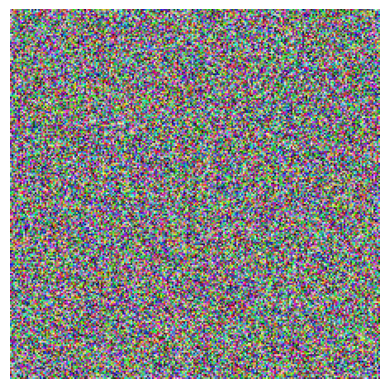

In [41]:
image.repeat(3,1,1,1).shape
# show the image
import matplotlib.pyplot as plt
plt.imshow(image.permute(1, 2, 0))
plt.axis('off')
plt.show()

In [45]:
prompt = "a photo of a cat"

In [50]:
sd_clip_score = calculate_clip_score(image.unsqueeze(0).permute(0, 2, 3, 1).numpy(), [3*prompt])
print(sd_clip_score)

20.6551
